# Research  of classical methods of regression analysis.
## Author: Tunik Vadim

File with data: Medicare.csv \
Response: COV_CHG \
Regressors: TOT_CHG, MED_REIB, TOT_D, NUM_DCHG, AVE_T_D

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's load the dataset file and examine the first occurrences.

In [62]:
df = pd.read_csv('Medicare.csv')
df.head()

,STATE,YEAR,TOT_CHG,COV_CHG,MED_REIB,TOT_D,NUM_DCHG,AVE_T_D,NMSTATE
0,1,1,2211617271,2170240349,972752944,1932673,230015,8,AL
1,1,2,2523987347,2468263759,1046016144,1936939,234739,8,AL
2,1,3,2975969979,2922611694,1205791592,2016354,245027,8,AL
3,1,4,3194595003,3149745611,1307982985,1948427,243947,8,AL
4,1,5,3417704863,3384305357,1376211788,1926335,258384,7,AL


Let's check whether our dataset contains blank cells, the size of the dataset, etc. 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     324 non-null    int64 
 1   YEAR      324 non-null    int64 
 2   TOT_CHG   324 non-null    int64 
 3   COV_CHG   324 non-null    int64 
 4   MED_REIB  324 non-null    int64 
 5   TOT_D     324 non-null    int64 
 6   NUM_DCHG  324 non-null    int64 
 7   AVE_T_D   324 non-null    int64 
 8   NMSTATE   324 non-null    object
dtypes: int64(8), object(1)
memory usage: 22.9+ KB


Let's extract regressors and responses from the dataframe.

In [64]:
regressors_names = ["TOT_CHG", "MED_REIB", "TOT_D", "NUM_DCHG", "AVE_T_D"]
x = df[regressors_names]
y = pd.DataFrame(df["COV_CHG"])

Normalize the data.

In [65]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)
y = min_max_scaler.fit_transform(y)

Let's divide the dataset into training and test in a ratio of 0.8/0.2.

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024)

### 1) Build the Ordinary Least Squares (OLS), conclusions about the quality of the model and OLS.

In [67]:
# Ordinary least squares Linear Regression.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

score_train, score_test = reg.score(x_train, y_train), reg.score(x_test, y_test)

print(f'R-Squared for ordinary least squares: \ntrain: {score_train}, \ntest: {score_test}')

R-Squared for ordinary least squares: 
train: 0.9997585413176983, 
test: 0.9991835877073765


Let's build correlations between the regressors.

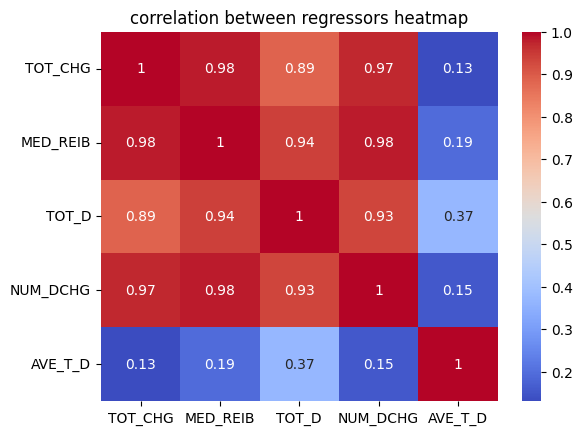

In [68]:
# correlations between regressors
correlation_matrix = pd.DataFrame(x_train).corr()
heatmap =sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
heatmap.set_yticklabels(regressors_names, rotation=0)
heatmap.set_xticklabels(regressors_names)
_ = plt.title('correlation between regressors heatmap')

Let's take a look at the quality metrics of the LSE.

Let us explain some notations and formulas: \
$k$ is the number of regressors, $n$ is the number of observations. \
$S S R=\sum_{i=1}^n\left(\hat{y}_i-\bar{y}\right)^2$,
$S S E=\sum_{i=1}^n\left({y}_i-\hat{y}_i\right)^2$ \
\
$ MSR = \dfrac{SSR}{k} $, $ MSE = \dfrac{SSE}{n-k-1} $, $ F-statistic = \dfrac{MSR}{MSE} $



for train dataset:
MSE: 9.004356415457829e-06, 
R-squared: 0.9997585413176981 
Residuals variance: 8.829853384150504e-06
F-statistic: 209509.06262071567, p-value: 1.1102230246251565e-16

for test dataset:
MSE: 2.7890032377338324e-05, 
R-squared: 0.9991946549942722 
Residuals variance: 2.433505832546218e-05
F-statistic: 14640.305515120896, p-value: 1.1102230246251565e-16


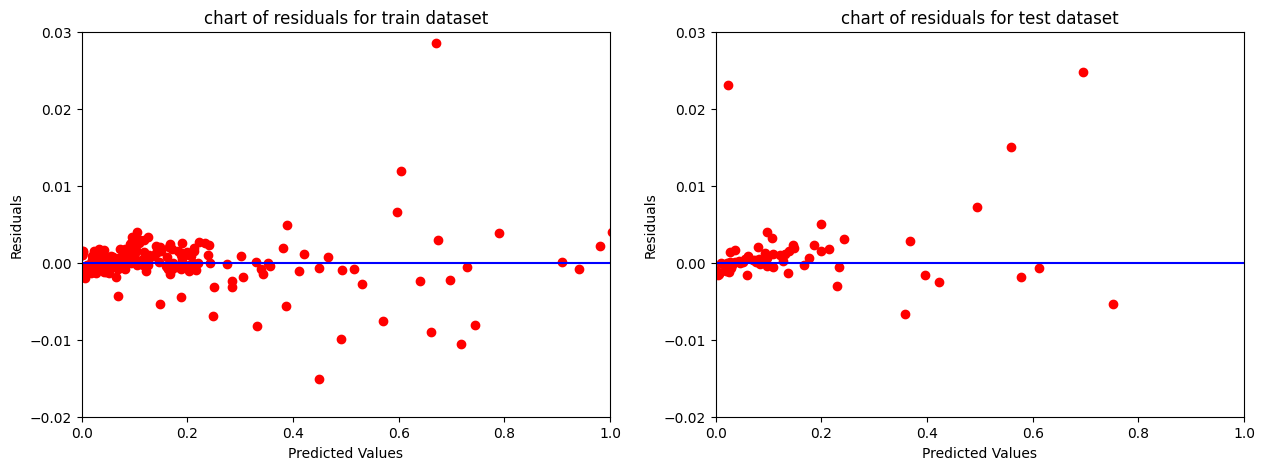

In [69]:
from scipy.stats import f

# metrics for train
y_pred_train = reg.predict(x_train)
y_train_mean = y_train.mean()
n_train, k_train = x_train.shape
SSR_train = np.sum((y_pred_train - y_train_mean)**2)
MSR_train = SSR_train/k_train
residuals_train = y_pred_train - y_train 
SSE_train = np.sum((residuals_train)**2)  
MSE_train = SSE_train / (n_train-k_train-1)
residuals_variance_train = pd.DataFrame(residuals_train).var()[0]
F_statistic_train = MSR_train/MSE_train
p_value_train = 1 - f.cdf(F_statistic_train, k_train, n_train-k_train-1)
R2_train = SSR_train / (SSR_train+SSE_train)
print(f'for train dataset:\nMSE: {MSE_train}, \nR-squared: {R2_train} \nResiduals variance: {residuals_variance_train}\nF-statistic: {F_statistic_train}, p-value: {p_value_train}\n')

# metrics for test
y_pred_test = reg.predict(x_test)
y_test_mean = y_test.mean()
n_test, k_test = x_test.shape
SSR_test = np.sum((y_pred_test - y_test_mean)**2)
MSR_test = SSR_test/k_test
residuals_test = y_pred_test - y_test
SSE_test = np.sum((residuals_test)**2)  
MSE_test = SSE_test / (n_test-k_test-1)
residuals_variance_test = pd.DataFrame(residuals_test).var()[0]
F_statistic_test = MSR_test/MSE_test
p_value_test = 1 - f.cdf(F_statistic_test, k_test, n_test-k_test-1)
R2_test = SSR_test / (SSR_test+SSE_test)
print(f'for test dataset:\nMSE: {MSE_test}, \nR-squared: {R2_test} \nResiduals variance: {residuals_variance_test}\nF-statistic: {F_statistic_test}, p-value: {p_value_test}')


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_xlabel('Predicted Values')
ax[0].scatter(y_pred_train, residuals_train, c='r')
ax[0].set_ylabel('Residuals')
ax[0].set_title('chart of residuals for train dataset')
ax[0].axhline(y=0, color='blue', linestyle='-')
ax[0].set_xlim(0,1)
ax[0].set_ylim(-0.02,0.03)

ax[1].scatter(y_pred_test, residuals_test, c='r')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('chart of residuals for test dataset')
ax[1].axhline(y=0, color='blue', linestyle='-')
ax[1].set_xlim(0,1)
ax[1].set_ylim(-0.02,0.03)
plt.show()

So, we can see that a simple linear regression performs almost perfectly on both the training and test datasets. All the metrics point to the success of our model: almost unity of the coefficient of determination; low MSE; almost zero p-value of the Fisher's test. It is also natural that the quality metrics are slightly worse on the test data.

Analyzing the scatter plot of the residuals, it occurs to us that our residuals are NOT normally distributed. Let's check this with the Shapiro-Wilk test (we choose this test because we have a relatively small number of observations and the asymptotic test is not suitable for us).

In [70]:
from scipy.stats import shapiro

y_pred = reg.predict(x)
residuals = y_pred - y
res_shapiro = shapiro(residuals)
print(f"The test statistic: {res_shapiro.statistic}, \nThe p-value for the hypothesis test: {res_shapiro.pvalue}")

The test statistic: 0.6173712179934623, 
The p-value for the hypothesis test: 3.163681955141831e-26


So, from the almost zero p-value, we conclude that our residuals are not normally distributed. Therefore, the Fisher's test on the original data does not make sense, because it assumes normality. So let's try to remove the outliers that are likely to distort our normally distributed residuals.

Anomalies amount: 7


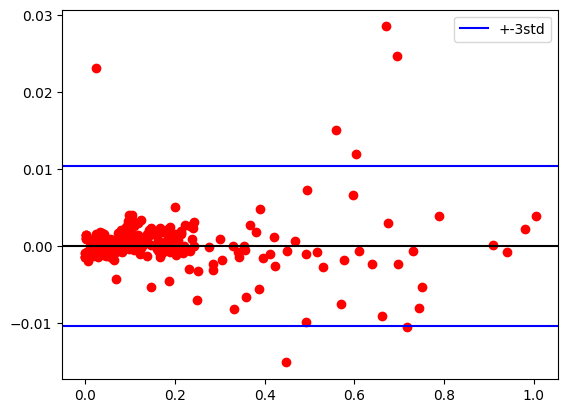

In [71]:
std = np.std(residuals)
plt.scatter(y_pred, residuals, c='red')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=3*std, color='blue', linestyle='-', label='+-3std')
plt.axhline(y=-3*std, color='blue', linestyle='-')
plt.legend()

anomalies_ind = np.abs(residuals)>3*std
print(f"Anomalies amount: {np.sum(anomalies_ind)}")

Let's discard the outliers and check the remaining residuals for normality.

In [72]:
boolean_array = np.squeeze(anomalies_ind)
x_clean, y_clean = x[~boolean_array], y[~boolean_array]

y_clean_pred = reg.predict(x_clean)
residuals_clean = y_clean_pred - y_clean
res_shapiro_clean = shapiro(residuals_clean)
print(f"The test statistic: {res_shapiro_clean.statistic}, \nThe p-value for the hypothesis test: {res_shapiro_clean.pvalue}")

The test statistic: 0.8720198328503346, 
The p-value for the hypothesis test: 1.4503073065299963e-15


So, as we can see, the result of the normality test showed that the residuals deviate from the normal distribution, which may indicate that the tests for quality control of the OLS are inaccurate. Nevertheless, the resulting model has a very high coefficient of determination and perfectly predicts the data on the test sample. Therefore, we will continue to work with the previous dataset, since removing anomalies did not help us, but do not rely on the Fisher test as a representative quality metric.

### 2) Try to improve the estimate by using a ridge regression.

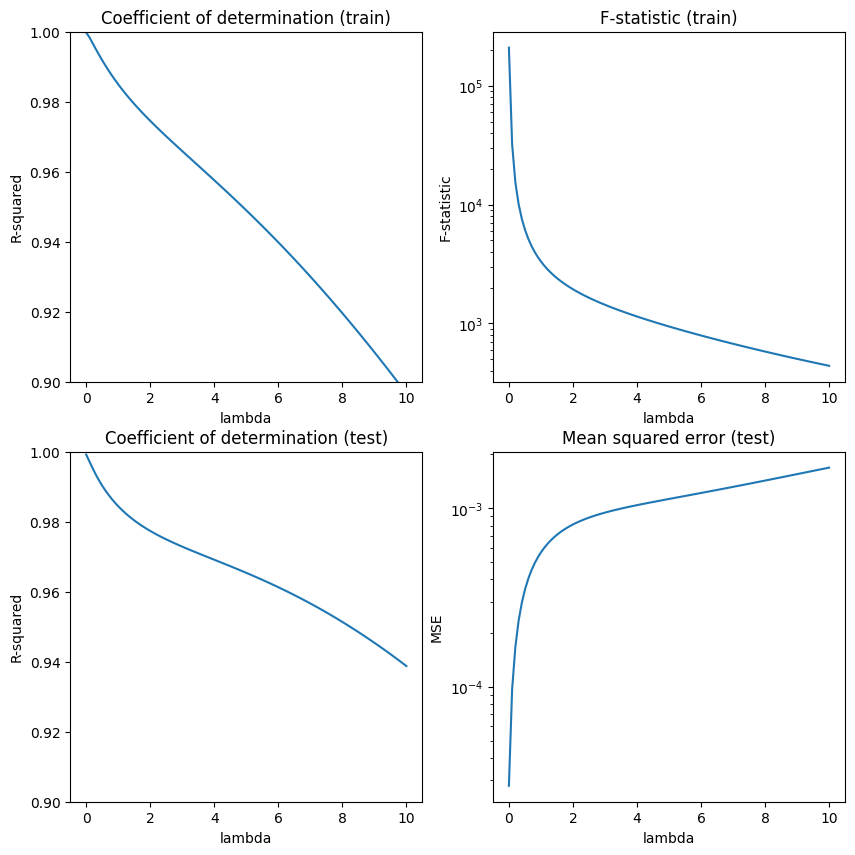

In [73]:
# Linear least squares with l2 regularization.
from sklearn.linear_model import Ridge


lambda_list = np.linspace(0, 10, 100)
R2_train_history = []
R2_test_history = []
F_stat_train_history = []
MSE_test_history = []

for lambd in lambda_list:
    reg_l2 = Ridge(alpha=lambd)
    reg_l2.fit(x_train, y_train)

    # metrics for train
    y_pred_train = reg_l2.predict(x_train)
    y_train_mean = y_train.mean()
    n_train, k_train = x_train.shape
    SSR_train = np.sum((y_pred_train - y_train_mean)**2)
    MSR_train = SSR_train/k_train
    residuals_train = y_pred_train - y_train 
    SSE_train = np.sum((residuals_train)**2)  
    MSE_train = SSE_train / (n_train-k_train-1)
    F_statistic_train = MSR_train/MSE_train
    R2_train = SSR_train / (SSR_train+SSE_train)
    F_stat_train_history.append(F_statistic_train)
    R2_train_history.append(R2_train)

    # metrics for test
    y_pred_test = reg_l2.predict(x_test)
    y_test_mean = y_test.mean()
    n_test, k_test = x_test.shape
    SSR_test = np.sum((y_pred_test - y_test_mean)**2)
    residuals_test = y_pred_test - y_test
    SSE_test = np.sum((residuals_test)**2)  
    MSE_test = SSE_test / (n_test-k_test-1)
    MSE_test_history.append(MSE_test)
    R2_test = SSR_test / (SSR_test+SSE_test)
    R2_test_history.append(R2_test)


fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].plot(lambda_list, R2_train_history)
ax[0][0].set_xlabel('lambda')
ax[0][0].set_ylabel('R-squared')
ax[0][0].set_title('Coefficient of determination (train)')
ax[0][0].set_ylim(0.9,1)

ax[0][1].plot(lambda_list, F_stat_train_history)
ax[0][1].set_xlabel('lambda')
ax[0][1].set_ylabel('F-statistic')
ax[0][1].set_yscale('log')
ax[0][1].set_title('F-statistic (train)')

ax[1][0].plot(lambda_list, R2_test_history)
ax[1][0].set_xlabel('lambda')
ax[1][0].set_ylabel('R-squared')
ax[1][0].set_title('Coefficient of determination (test)')
ax[1][0].set_ylim(0.9,1)

ax[1][1].plot(lambda_list, MSE_test_history)
ax[1][1].set_xlabel('lambda')
ax[1][1].set_ylabel('MSE')
ax[1][1].set_title('Mean squared error (test)')
ax[1][1].set_yscale('log')

plt.show()

The graphs show that as λ increases, our model degrades (the variance increases) and the best result is obtained when λ=0: that is, the Ridge regression degenerates into a simple OLS.

Looking back at the results of a simple linear regression on our data (almost perfect), it is natural to see that there was no improvement.

### 3) Try to improve the estimate by adding nonlinearity to the model.

Let's add nonlinearity to the model by adding polynomials, logarithms, and exponents to the regressors.

for nonlinear train dataset:
MSE: 1.4903769233983958e-06, 
R-squared: 0.9999631937419724 
Residuals variance: 1.3459605548520188e-06
F-statistic: 253208.4885863196, p-value: 1.1102230246251565e-16

for nonlinear test dataset:
MSE: 76098.47693513877, 
R-squared: 0.49995614429531976 
Residuals variance: 45659.06285870417
F-statistic: 1.5597263644037591, p-value: 0.10408629043802664


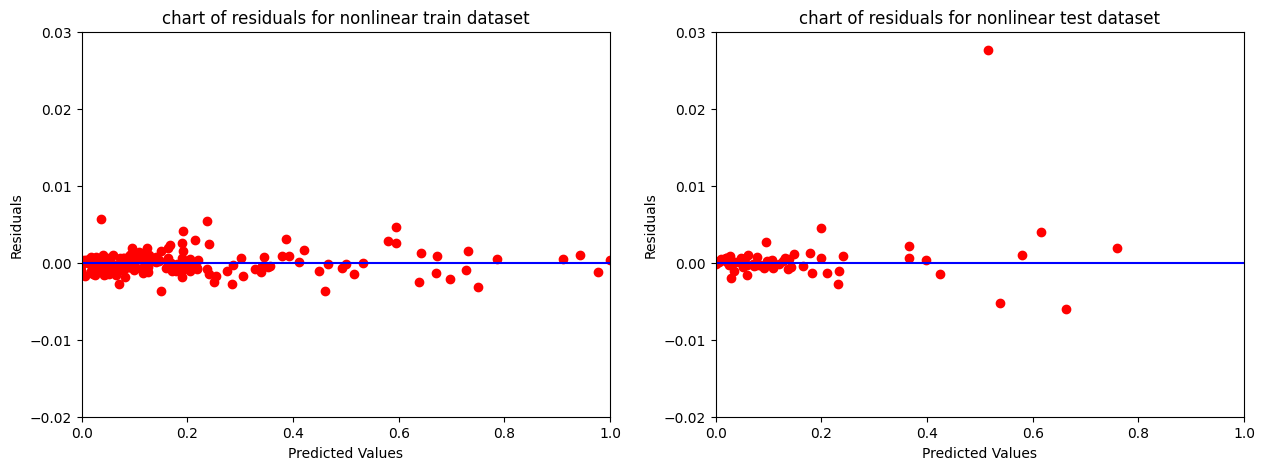

In [74]:
x_nonlinear = np.column_stack((x, x**2, x**3, x**4, np.exp(x)))
x_nonlinear_train, x_nonlinear_test, y_train, y_test = train_test_split(x_nonlinear, y, test_size=0.2, random_state=2024)
reg_nonlinear = LinearRegression()
reg_nonlinear.fit(x_nonlinear_train, y_train)

# metrics for train
y_pred_train = reg_nonlinear.predict(x_nonlinear_train)
y_train_mean = y_train.mean()
n_train, k_train = x_nonlinear_train.shape
SSR_train = np.sum((y_pred_train - y_train_mean)**2)
MSR_train = SSR_train/k_train
residuals_train = y_pred_train - y_train 
SSE_train = np.sum((residuals_train)**2)  
MSE_train = SSE_train / (n_train-k_train-1)
residuals_variance_train = pd.DataFrame(residuals_train).var()[0]
F_statistic_train = MSR_train/MSE_train
p_value_train = 1 - f.cdf(F_statistic_train, k_train, n_train-k_train-1)
R2_train = SSR_train / (SSR_train+SSE_train)
print(f'for nonlinear train dataset:\nMSE: {MSE_train}, \nR-squared: {R2_train} \nResiduals variance: {residuals_variance_train}\nF-statistic: {F_statistic_train}, p-value: {p_value_train}\n')

# metrics for test
y_pred_test = reg_nonlinear.predict(x_nonlinear_test)
y_test_mean = y_test.mean()
n_test, k_test = x_nonlinear_test.shape
SSR_test = np.sum((y_pred_test - y_test_mean)**2)
MSR_test = SSR_test/k_test
residuals_test = y_pred_test - y_test
SSE_test = np.sum((residuals_test)**2)  
MSE_test = SSE_test / (n_test-k_test-1)
residuals_variance_test = pd.DataFrame(residuals_test).var()[0]
F_statistic_test = MSR_test/MSE_test
p_value_test = 1 - f.cdf(F_statistic_test, k_test, n_test-k_test-1)
R2_test = SSR_test / (SSR_test+SSE_test)
print(f'for nonlinear test dataset:\nMSE: {MSE_test}, \nR-squared: {R2_test} \nResiduals variance: {residuals_variance_test}\nF-statistic: {F_statistic_test}, p-value: {p_value_test}')


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_xlabel('Predicted Values')
ax[0].scatter(y_pred_train, residuals_train, c='r')
ax[0].set_ylabel('Residuals')
ax[0].set_title('chart of residuals for nonlinear train dataset')
ax[0].axhline(y=0, color='blue', linestyle='-')
ax[0].set_xlim(0,1)
ax[0].set_ylim(-0.02,0.03)

ax[1].scatter(y_pred_test, residuals_test, c='r')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('chart of residuals for nonlinear test dataset')
ax[1].axhline(y=0, color='blue', linestyle='-')
ax[1].set_xlim(0,1)
ax[1].set_ylim(-0.02,0.03)
plt.show()

We can see that the quality of metrics on the training data has increased, but on the test data it has dropped significantly. This indicates that our model is overfitting (it extrapolates data very poorly). Therefore, we should reduce the number of nonlinear regressors. Let's add only squares and see how the model performs on the test.

for nonlinear train dataset:
MSE: 6.882467316103772e-06, 
R-squared: 0.9998190887949763 
Residuals variance: 6.615705017029984e-06
F-statistic: 137059.02516578583, p-value: 1.1102230246251565e-16

for nonlinear test dataset:
MSE: 0.0009347913628886059, 
R-squared: 0.9757310245022744 
Residuals variance: 0.0007723607025761477
F-statistic: 217.10630235734874, p-value: 1.1102230246251565e-16


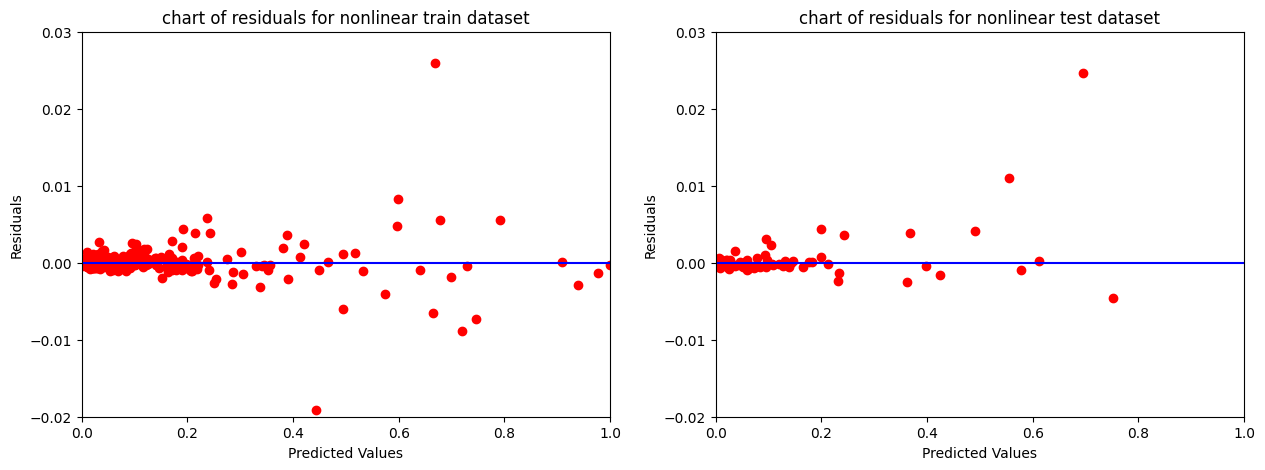

In [75]:
x_nonlinear = np.column_stack((x, x**2))
x_nonlinear_train, x_nonlinear_test, y_train, y_test = train_test_split(x_nonlinear, y, test_size=0.2, random_state=2024)
reg_nonlinear = LinearRegression()
reg_nonlinear.fit(x_nonlinear_train, y_train)

# metrics for train
y_pred_train = reg_nonlinear.predict(x_nonlinear_train)
y_train_mean = y_train.mean()
n_train, k_train = x_nonlinear_train.shape
SSR_train = np.sum((y_pred_train - y_train_mean)**2)
MSR_train = SSR_train/k_train
residuals_train = y_pred_train - y_train 
SSE_train = np.sum((residuals_train)**2)  
MSE_train = SSE_train / (n_train-k_train-1)
residuals_variance_train = pd.DataFrame(residuals_train).var()[0]
F_statistic_train = MSR_train/MSE_train
p_value_train = 1 - f.cdf(F_statistic_train, k_train, n_train-k_train-1)
R2_train = SSR_train / (SSR_train+SSE_train)
print(f'for nonlinear train dataset:\nMSE: {MSE_train}, \nR-squared: {R2_train} \nResiduals variance: {residuals_variance_train}\nF-statistic: {F_statistic_train}, p-value: {p_value_train}\n')

# metrics for test
y_pred_test = reg_nonlinear.predict(x_nonlinear_test)
y_test_mean = y_test.mean()
n_test, k_test = x_nonlinear_test.shape
SSR_test = np.sum((y_pred_test - y_test_mean)**2)
MSR_test = SSR_test/k_test
residuals_test = y_pred_test - y_test
SSE_test = np.sum((residuals_test)**2)  
MSE_test = SSE_test / (n_test-k_test-1)
residuals_variance_test = pd.DataFrame(residuals_test).var()[0]
F_statistic_test = MSR_test/MSE_test
p_value_test = 1 - f.cdf(F_statistic_test, k_test, n_test-k_test-1)
R2_test = SSR_test / (SSR_test+SSE_test)
print(f'for nonlinear test dataset:\nMSE: {MSE_test}, \nR-squared: {R2_test} \nResiduals variance: {residuals_variance_test}\nF-statistic: {F_statistic_test}, p-value: {p_value_test}')


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_xlabel('Predicted Values')
ax[0].scatter(y_pred_train, residuals_train, c='r')
ax[0].set_ylabel('Residuals')
ax[0].set_title('chart of residuals for nonlinear train dataset')
ax[0].axhline(y=0, color='blue', linestyle='-')
ax[0].set_xlim(0,1)
ax[0].set_ylim(-0.02,0.03)

ax[1].scatter(y_pred_test, residuals_test, c='r')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('chart of residuals for nonlinear test dataset')
ax[1].axhline(y=0, color='blue', linestyle='-')
ax[1].set_xlim(0,1)
ax[1].set_ylim(-0.02,0.03)
plt.show()

Thus, we can see that the quality of the nonlinear model with squared regressors is slightly better than the previous complex nonlinear model. However, the results, as expected, are still worse than the conventional OLS, which performs almost perfectly.

### 4) Find out whether the number of regressors can be reduced without significantly compromising the model.

Let's look again at the correlation between the regressors.

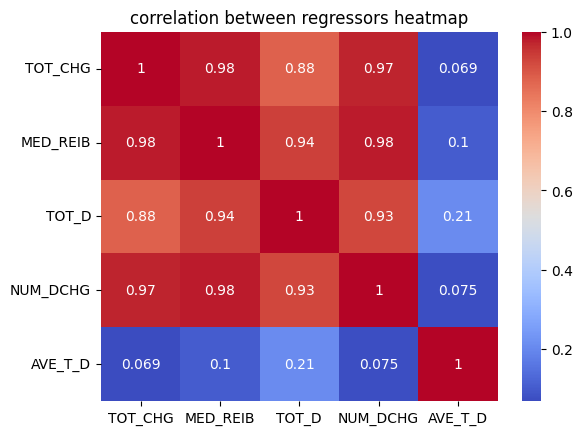

In [76]:
correlation_matrix = pd.DataFrame(x).corr()
heatmap =sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
heatmap.set_yticklabels(regressors_names, rotation=0)
heatmap.set_xticklabels(regressors_names)
_ = plt.title('correlation between regressors heatmap')

We can see from the hitmap that we can reduce the number of regressors to at least two. Let's keep TOT_CHG and AVE_T_D.

for train dataset:
MSE: 2.8892587865993773e-05, 
R-squared: 0.9992160361519999 
Residuals variance: 2.866861431664499e-05
F-statistic: 163144.83499939967, p-value: 1.1102230246251565e-16

for test dataset:
MSE: 0.00019307723068654397, 
R-squared: 0.9944078824047079 
Residuals variance: 0.000186748679723939
F-statistic: 5512.517186780636, p-value: 1.1102230246251565e-16


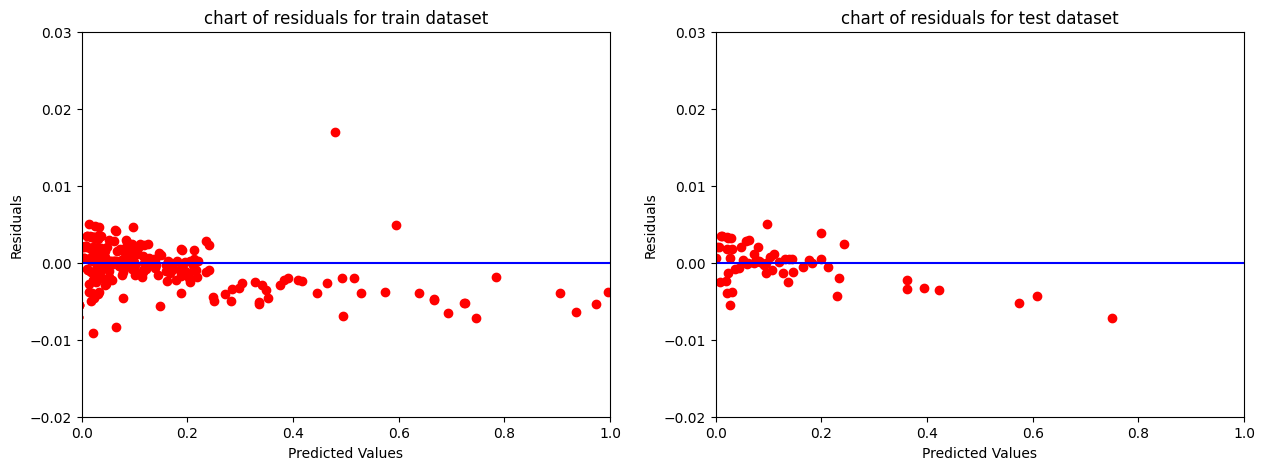

In [77]:
x_without_regressor = np.column_stack((x[:,0],x[:,-1]))
# x_without_regressor = x[:, 0].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_without_regressor, y, test_size=0.2, random_state=2024)

reg_without_regressor = LinearRegression()
reg_without_regressor.fit(x_train, y_train)

# metrics for train
y_pred_train = reg_without_regressor.predict(x_train)
y_train_mean = y_train.mean()
n_train, k_train = x_train.shape
SSR_train = np.sum((y_pred_train - y_train_mean)**2)
MSR_train = SSR_train/k_train
residuals_train = y_pred_train - y_train 
SSE_train = np.sum((residuals_train)**2)  
MSE_train = SSE_train / (n_train-k_train-1)
residuals_variance_train = pd.DataFrame(residuals_train).var()[0]
F_statistic_train = MSR_train/MSE_train
p_value_train = 1 - f.cdf(F_statistic_train, k_train, n_train-k_train-1)
R2_train = SSR_train / (SSR_train+SSE_train)
print(f'for train dataset:\nMSE: {MSE_train}, \nR-squared: {R2_train} \nResiduals variance: {residuals_variance_train}\nF-statistic: {F_statistic_train}, p-value: {p_value_train}\n')

# metrics for test
y_pred_test = reg_without_regressor.predict(x_test)
y_test_mean = y_test.mean()
n_test, k_test = x_test.shape
SSR_test = np.sum((y_pred_test - y_test_mean)**2)
MSR_test = SSR_test/k_test
residuals_test = y_pred_test - y_test
SSE_test = np.sum((residuals_test)**2)  
MSE_test = SSE_test / (n_test-k_test-1)
residuals_variance_test = pd.DataFrame(residuals_test).var()[0]
F_statistic_test = MSR_test/MSE_test
p_value_test = 1 - f.cdf(F_statistic_test, k_test, n_test-k_test-1)
R2_test = SSR_test / (SSR_test+SSE_test)
print(f'for test dataset:\nMSE: {MSE_test}, \nR-squared: {R2_test} \nResiduals variance: {residuals_variance_test}\nF-statistic: {F_statistic_test}, p-value: {p_value_test}')


fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_xlabel('Predicted Values')
ax[0].scatter(y_pred_train, residuals_train, c='r')
ax[0].set_ylabel('Residuals')
ax[0].set_title('chart of residuals for train dataset')
ax[0].axhline(y=0, color='blue', linestyle='-')
ax[0].set_xlim(0,1)
ax[0].set_ylim(-0.02,0.03)

ax[1].scatter(y_pred_test, residuals_test, c='r')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('chart of residuals for test dataset')
ax[1].axhline(y=0, color='blue', linestyle='-')
ax[1].set_xlim(0,1)
ax[1].set_ylim(-0.02,0.03)
plt.show()

Thus, we can see that the exclusion of three regressors from the model was without significant damage to the model. \
However, it is possible that we can keep only one regressor without significant damage to the model. Let's look at the quality of the model for each.

In [78]:
regressors_names

['TOT_CHG', 'MED_REIB', 'TOT_D', 'NUM_DCHG', 'AVE_T_D']

Regression with only TOT_CHG regressor:
for train dataset:
MSE: 3.7052215316751344e-05, 
R-squared: 0.9989907077687594 
Residuals variance: 3.690860207908952e-05
F-statistic: 254376.8830767468, p-value: 1.1102230246251565e-16

for test dataset:
MSE: 0.00013052363623570538, 
R-squared: 0.9961367991665699 
Residuals variance: 0.00012522397675408564
F-statistic: 16244.720648336834, p-value: 1.1102230246251565e-16


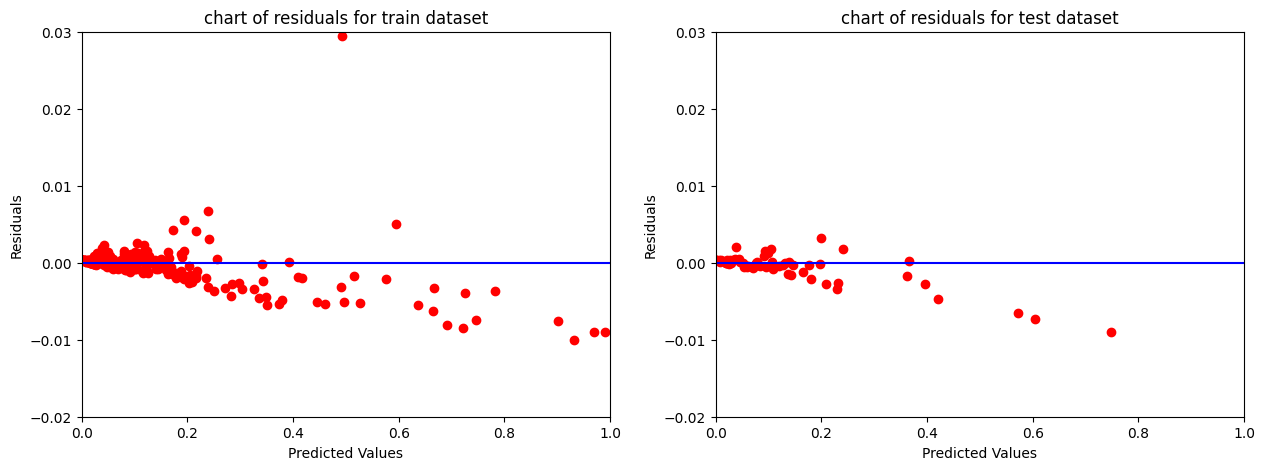

Regression with only MED_REIB regressor:
for train dataset:
MSE: 0.0015302575852604117, 
R-squared: 0.958316201085495 
Residuals variance: 0.00152432635430979
F-statistic: 5908.464921446246, p-value: 1.1102230246251565e-16

for test dataset:
MSE: 0.002290015242535103, 
R-squared: 0.9451295087078421 
Residuals variance: 0.0022007214199813558
F-statistic: 1085.1581177131516, p-value: 1.1102230246251565e-16


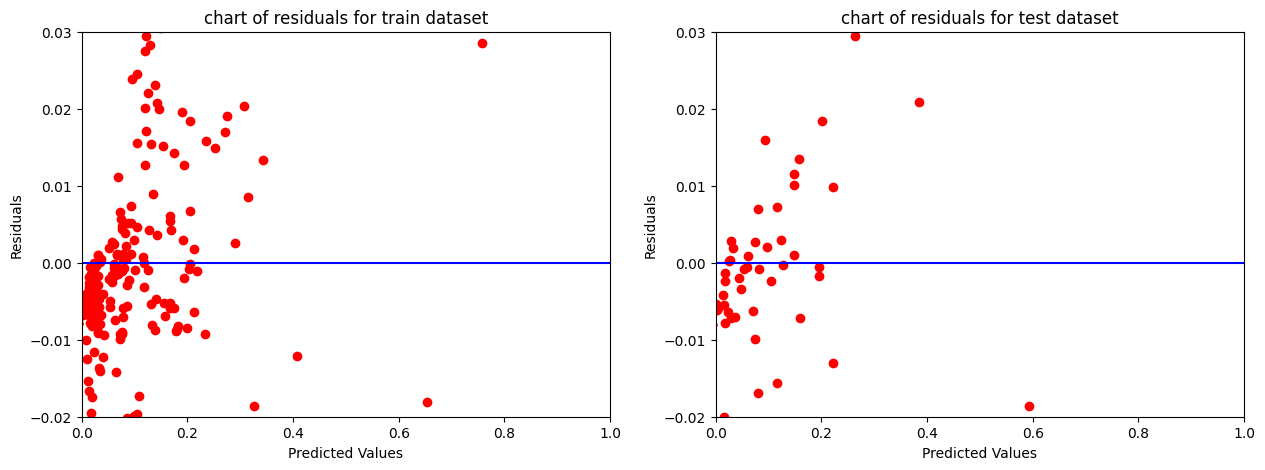

Regression with only TOT_D regressor:
for train dataset:
MSE: 0.008463915559834143, 
R-squared: 0.7694452505096143 
Residuals variance: 0.00843110968557122
F-statistic: 857.7026923889813, p-value: 1.1102230246251565e-16

for test dataset:
MSE: 0.010924454959822662, 
R-squared: 0.8035895225626567 
Residuals variance: 0.010512640444985195
F-statistic: 257.7568191981895, p-value: 1.1102230246251565e-16


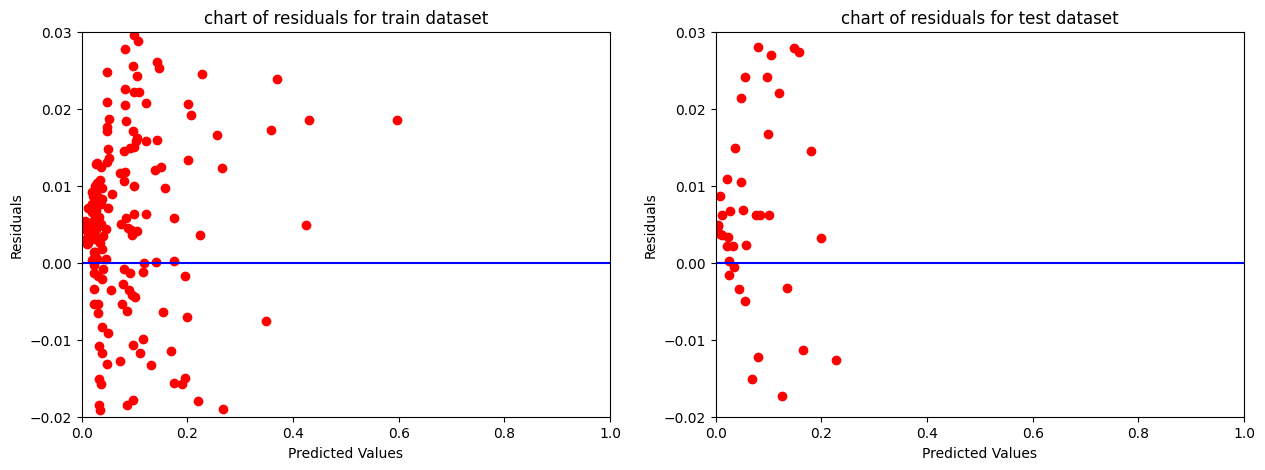

Regression with only NUM_DCHG regressor:
for train dataset:
MSE: 0.002126590738337947, 
R-squared: 0.94207224877422 
Residuals variance: 0.0021183481385769476
F-statistic: 4179.560967096988, p-value: 1.1102230246251565e-16

for test dataset:
MSE: 0.001687406822869477, 
R-squared: 0.9538421252513782 
Residuals variance: 0.0016246508515387554
F-statistic: 1301.880864708379, p-value: 1.1102230246251565e-16


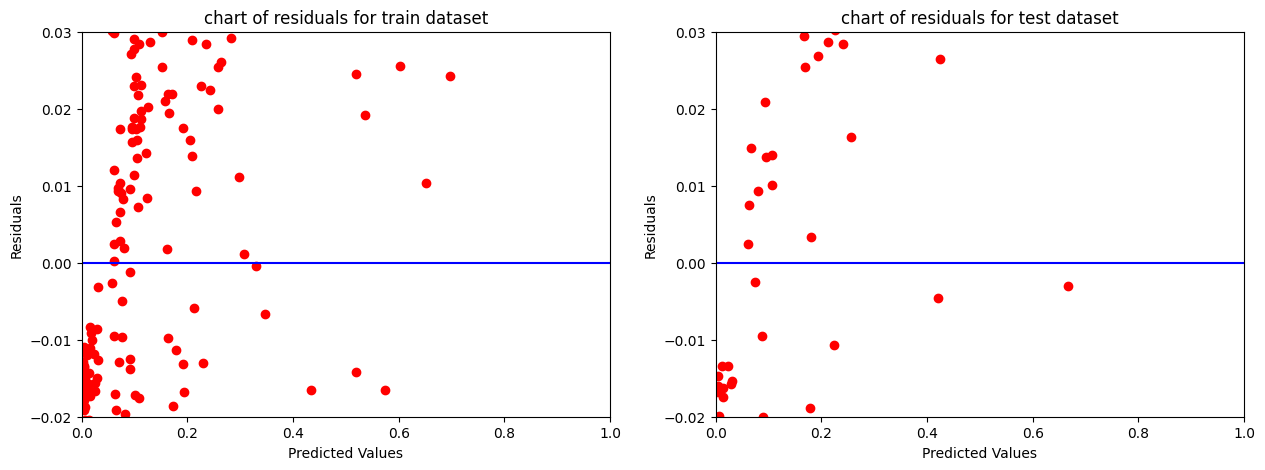

Regression with only AVE_T_D regressor:
for train dataset:
MSE: 0.03622009849551824, 
R-squared: 0.013374403830306667 
Residuals variance: 0.036079710516853436
F-statistic: 3.4838157430061574, p-value: 0.06311049768628896

for test dataset:
MSE: 0.03788102494427392, 
R-squared: 0.14295947854361177 
Residuals variance: 0.03725073144644681
F-statistic: 10.50877633293544, p-value: 0.0019005595847101375


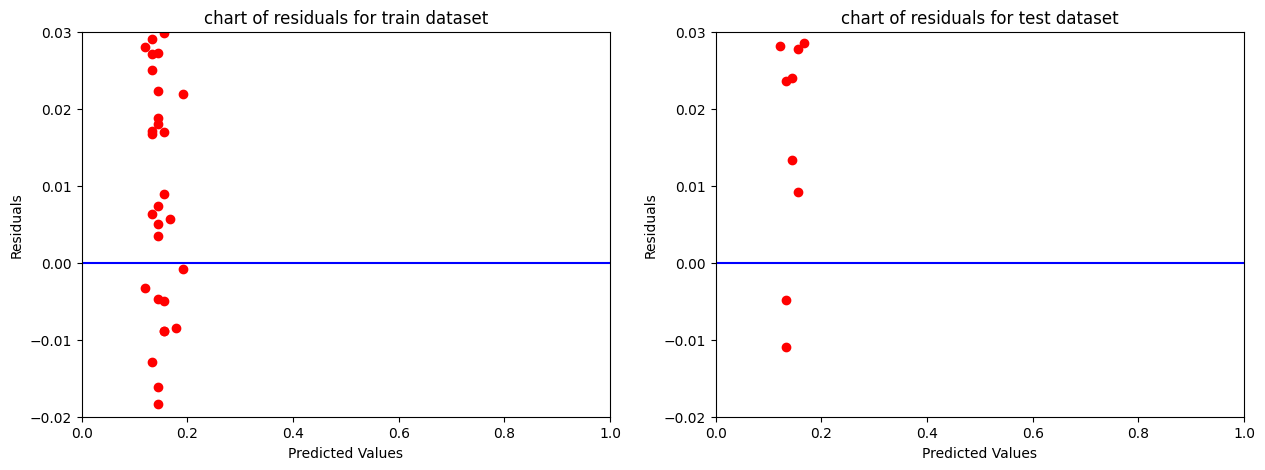

In [79]:
for i in range(len(regressors_names)):
    print(f'Regression with only {regressors_names[i]} regressor:')
    x_without_regressor = x[:, i].reshape(-1, 1)

    x_train, x_test, y_train, y_test = train_test_split(x_without_regressor, y, test_size=0.2, random_state=2024)

    reg_without_regressor = LinearRegression()
    reg_without_regressor.fit(x_train, y_train)

    # metrics for train
    y_pred_train = reg_without_regressor.predict(x_train)
    y_train_mean = y_train.mean()
    n_train, k_train = x_train.shape
    SSR_train = np.sum((y_pred_train - y_train_mean)**2)
    MSR_train = SSR_train/k_train
    residuals_train = y_pred_train - y_train 
    SSE_train = np.sum((residuals_train)**2)  
    MSE_train = SSE_train / (n_train-k_train-1)
    residuals_variance_train = pd.DataFrame(residuals_train).var()[0]
    F_statistic_train = MSR_train/MSE_train
    p_value_train = 1 - f.cdf(F_statistic_train, k_train, n_train-k_train-1)
    R2_train = SSR_train / (SSR_train+SSE_train)
    print(f'for train dataset:\nMSE: {MSE_train}, \nR-squared: {R2_train} \nResiduals variance: {residuals_variance_train}\nF-statistic: {F_statistic_train}, p-value: {p_value_train}\n')

    # metrics for test
    y_pred_test = reg_without_regressor.predict(x_test)
    y_test_mean = y_test.mean()
    n_test, k_test = x_test.shape
    SSR_test = np.sum((y_pred_test - y_test_mean)**2)
    MSR_test = SSR_test/k_test
    residuals_test = y_pred_test - y_test
    SSE_test = np.sum((residuals_test)**2)  
    MSE_test = SSE_test / (n_test-k_test-1)
    residuals_variance_test = pd.DataFrame(residuals_test).var()[0]
    F_statistic_test = MSR_test/MSE_test
    p_value_test = 1 - f.cdf(F_statistic_test, k_test, n_test-k_test-1)
    R2_test = SSR_test / (SSR_test+SSE_test)
    print(f'for test dataset:\nMSE: {MSE_test}, \nR-squared: {R2_test} \nResiduals variance: {residuals_variance_test}\nF-statistic: {F_statistic_test}, p-value: {p_value_test}')


    fig, ax = plt.subplots(1,2, figsize=(15,5))

    ax[0].set_xlabel('Predicted Values')
    ax[0].scatter(y_pred_train, residuals_train, c='r')
    ax[0].set_ylabel('Residuals')
    ax[0].set_title('chart of residuals for train dataset')
    ax[0].axhline(y=0, color='blue', linestyle='-')
    ax[0].set_xlim(0,1)
    ax[0].set_ylim(-0.02,0.03)

    ax[1].scatter(y_pred_test, residuals_test, c='r')
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Residuals')
    ax[1].set_title('chart of residuals for test dataset')
    ax[1].axhline(y=0, color='blue', linestyle='-')
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(-0.02,0.03)
    plt.show()

Thus, we see that our model works well with only one regressor TOT_CHG. \
Let's take a look at this regression.

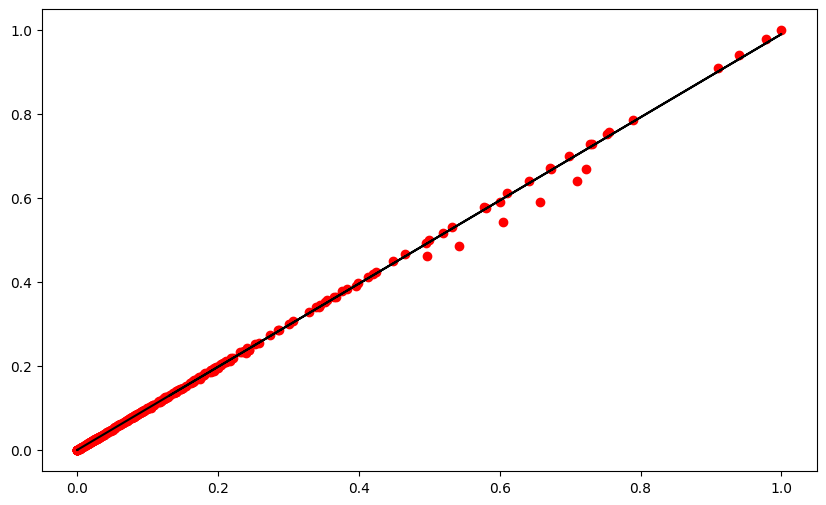

In [80]:
x_without_regressor = x[:, 0].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_without_regressor, y, test_size=0.2, random_state=2024)

reg_without_regressor = LinearRegression()
reg_without_regressor.fit(x_train, y_train)

y_pred = reg_without_regressor.predict(x_without_regressor)

fig = plt.figure(figsize=(10,6))
plt.plot(x_without_regressor, y_pred, c='black')
plt.scatter(x_without_regressor, y, c='red')
plt.show()